**Step 1: Data Analyze**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

dataset = pd.read_csv("/content/drive/MyDrive/NLP/Dataset.csv")

In [ ]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(dataset.head())

First 5 rows of the dataset:
                                        product_name  product_price  Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  

So the dataset does not have any null values. As this is the task of sentiment analysis of Flipkart reviews, I will clean and prepare the column containing reviews before heading to sentiment analysis:

In [ ]:
print("\nMissing Values:")
print(dataset.isnull().sum())



Missing Values:
product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64


## 1.1 Data Preprocessing

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
dataset["Review"] = dataset["Review"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Check dataset preview
print("Dataset Preview:")
print(dataset.head())

# Step 1: Text Cleaning
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # Remove special characters
    return text.lower().strip()

# Combine text for TF-IDF
dataset['combined_text'] = dataset['product_name'] + ' ' + dataset['Review']



Dataset Preview:
                                        product_name  product_price  Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     3   

            Review                                            Summary  \
0            super  great cooler excellent air flow and for this p...   
1           awesom              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral

**Step 2: Exploratory Data Analysis (EDA)**


In [ ]:
# Check the distribution of sentiments
print("\nSentiment Distribution:")
print(dataset['Sentiment'].value_counts())


Sentiment Distribution:
Sentiment
positive    4164
negative     595
neutral      174
Name: count, dtype: int64


<ipython-input-10-e137c073dede>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


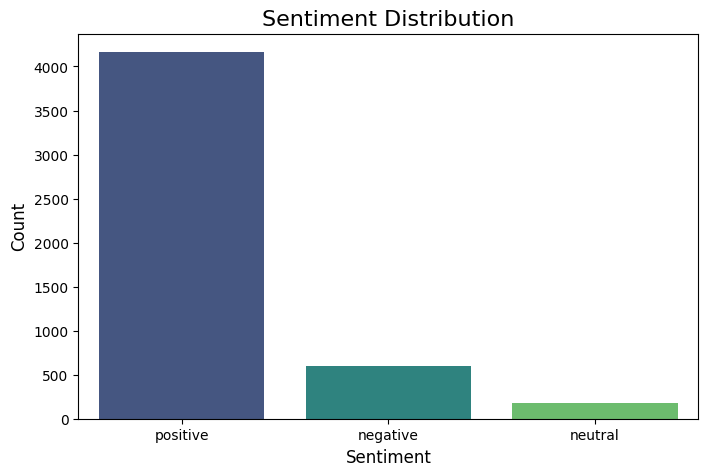

In [ ]:
# EDA: Sentiment distribution
sentiment_counts = dataset['Sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

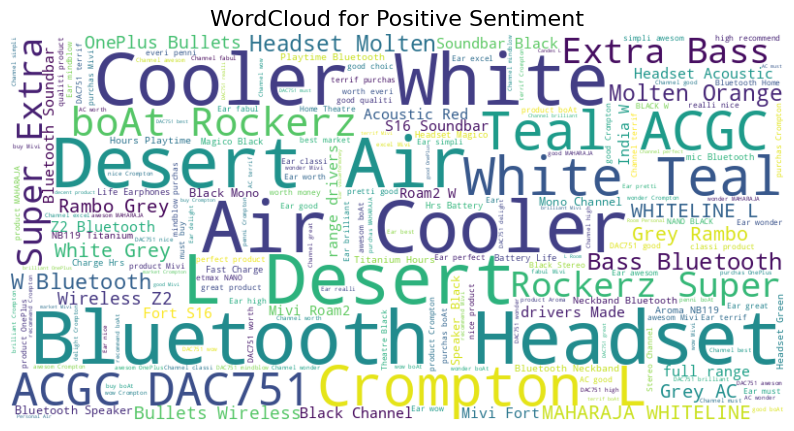

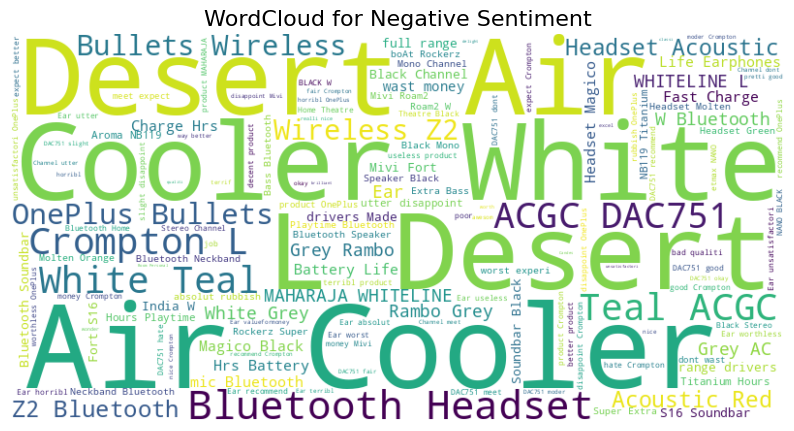

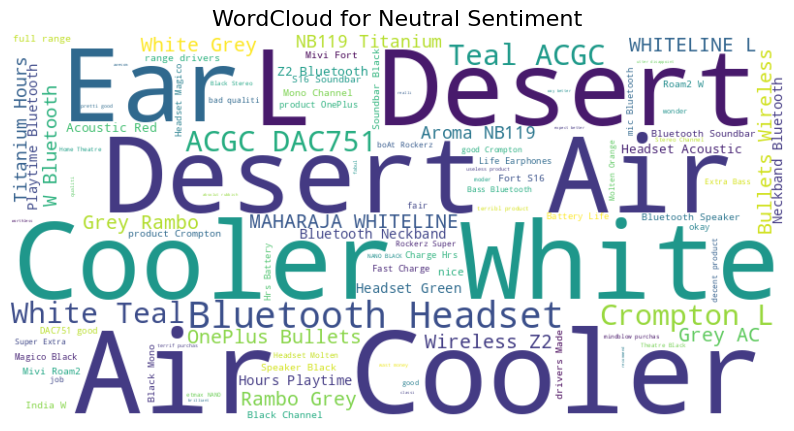

In [ ]:
# EDA: WordCloud for each sentiment
for sentiment in dataset['Sentiment'].unique():
    text = " ".join(dataset[dataset['Sentiment'] == sentiment]['combined_text'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment.capitalize()} Sentiment", fontsize=16)
    plt.show()

In [ ]:
ratings = dataset["Rate"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(dataset,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

So 61.1% of the reviewers have given 5 out of 5 ratings to the products they buy from Flipkart.

Let’s have a look at the kind of reviews people leave. For this, I will use a word cloud to visualize the most used words in the reviews column:

In [ ]:
# Generate Word Clouds for each sentiment (optional)
def plot_wordcloud(data, sentiment_label):
    sentiment_data = data[data['sentiment'] == sentiment_label]
    all_words = ' '.join(sentiment_data['processed_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment_label} Sentiment", fontsize=16)
    plt.axis("off")
    plt.show()

<ipython-input-14-b8c96900a0c4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




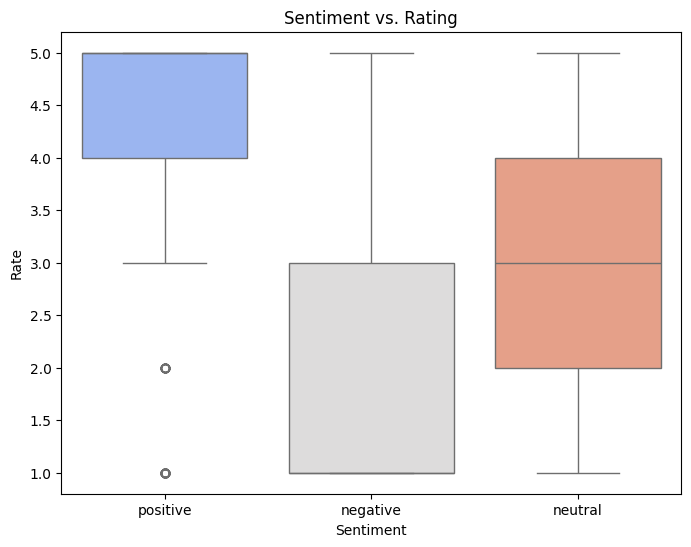

In [ ]:
# Sentiment vs Rating Analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Rate', data=dataset, palette='coolwarm')
plt.title("Sentiment vs. Rating")
plt.xlabel("Sentiment")
plt.ylabel("Rate")
plt.show()

**Step 3: Feature Engineering**

In [ ]:
# Import required library for feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Engineering: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 most relevant features
X = tfidf.fit_transform(dataset['combined_text']).toarray()  # Use the cleaned text as input features

# Display the shape of the resulting feature matrix
print(f"TF-IDF Feature Matrix Shape: {X.shape}")

# Save the feature names for understanding
tfidf_feature_names = tfidf.get_feature_names_out()

# Display a sample of TF-IDF features
print("\nSample TF-IDF Features:")
print(tfidf_feature_names[:20])  # Display first 20 features

# Target variable (Sentiment)
y = dataset['Sentiment']  # Labels for sentiment (positive, negative, neutral)

TF-IDF Feature Matrix Shape: (4933, 223)

Sample TF-IDF Features:
['12' '16' '30' '303' '48' '510' '60' '65' '75' 'aboveaverag' 'absolut'
 'ac' 'acgc' 'acoustic' 'afford' 'air' 'amaz' 'aroma' 'assembl' 'averag']


# Splitting the data

In [ ]:
# Splitting the data into training and testing sets
X = dataset['Review']  # Features (Review)
y = dataset['Sentiment']  # Labels (e.g., positive, negative, neutral)

**Step 4: Model Training**

In [ ]:
# Import required libraries for model training
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Feature Engineering: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Convert text into numerical vectors
X = tfidf.fit_transform(dataset['combined_text']).toarray()  # Use the 'combined_text' column as features
y = dataset['Sentiment']  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4.1 Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
logistic_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Perform Grid Search
grid_logistic = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy')
grid_logistic.fit(X_train, y_train)

# Best model
best_logistic = grid_logistic.best_estimator_
print("Best Logistic Regression Parameters:", grid_logistic.best_params_)


Best Logistic Regression Parameters: {'C': 1, 'solver': 'liblinear'}


## 4.1.1 Model Predictions

In [ ]:
# Make predictions on the test data
logistic_predictions = best_logistic.predict(X_test)

# Evaluate the model (if y_test is available)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate and print accuracy
accuracy = accuracy_score(y_test, logistic_predictions)
print("Accuracy Logistic Regression:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, logistic_predictions))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))

Accuracy Logistic Regression: 0.9108409321175278
Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.70      0.71       108
     neutral       0.28      0.20      0.23        35
    positive       0.95      0.97      0.96       844

    accuracy                           0.91       987
   macro avg       0.65      0.62      0.64       987
weighted avg       0.90      0.91      0.91       987

Confusion Matrix:
 [[ 76   9  23]
 [ 10   7  18]
 [ 19   9 816]]


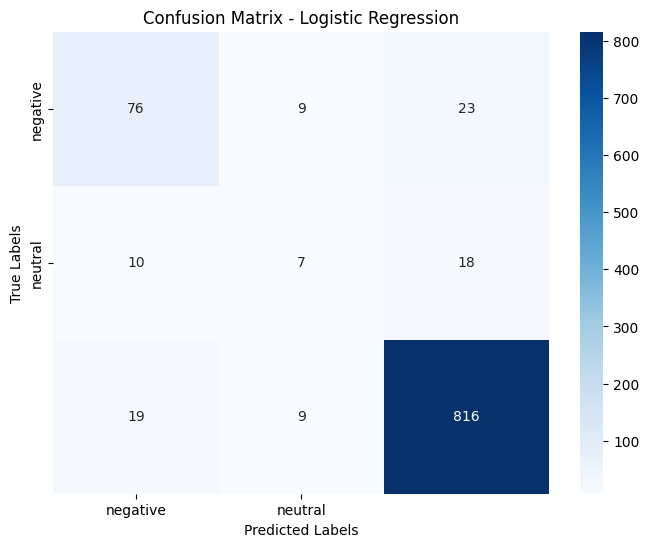

In [ ]:
# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, class_labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

 # Define class labels, for example:
class_labels = ['negative', 'neutral']

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, logistic_predictions, "Logistic Regression", class_labels)


**4.2 Radom Forest**

In [ ]:
# Model 2: Random Forest Classifier
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


Training Random Forest Classifier...


RandomForestClassifier(random_state=42)

## 4.2.1 Model Predictions

In [ ]:
# Random Forest Predictions
rf_preds = rf_model.predict(X_test)
print("\nRandom Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))


Random Forest Classifier Performance:
Accuracy: 0.9159067882472138
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.67      0.72       108
     neutral       0.12      0.03      0.05        35
    positive       0.94      0.98      0.96       844

    accuracy                           0.92       987
   macro avg       0.62      0.56      0.58       987
weighted avg       0.89      0.92      0.90       987



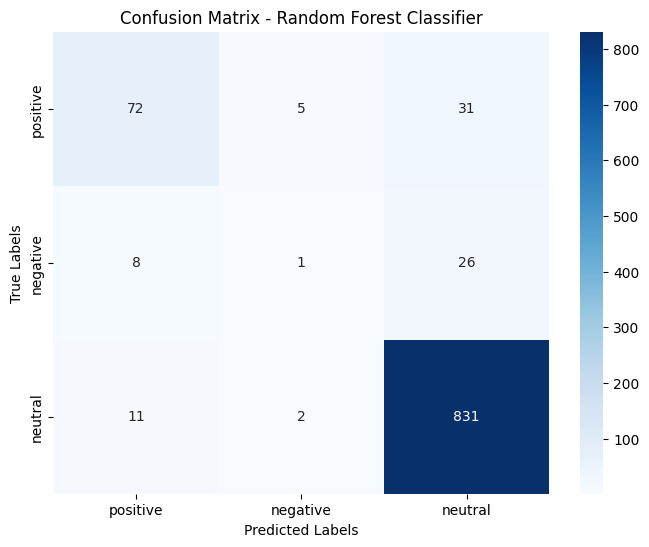

In [ ]:
# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Plot confusion matrix for Random Forest Classifier
plot_confusion_matrix(y_test, rf_preds, "Random Forest Classifier")

**Step 5: Model Performance Comparison**

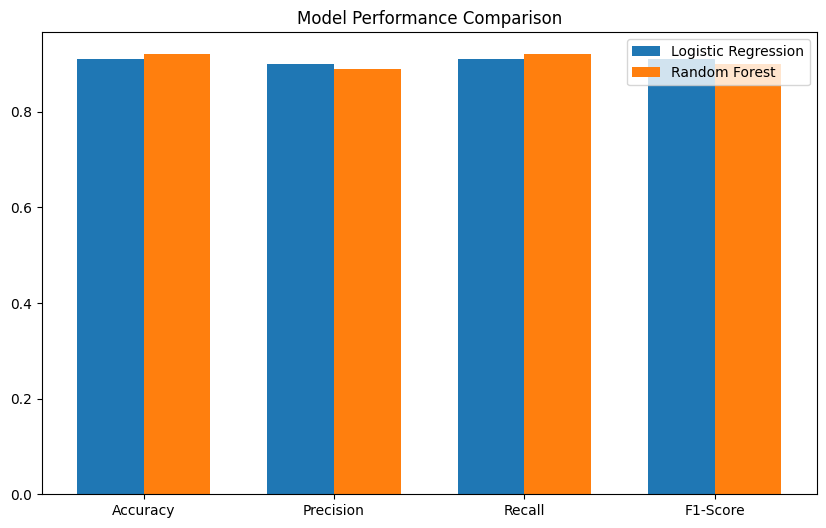

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example performance metrics data
import numpy as np
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
logistic_values = [0.91, 0.90, 0.91, 0.91]
rf_values = [0.92, 0.89, 0.92, 0.90]

# Create a bar chart comparing model metrics
fig, ax = plt.subplots(figsize=(10, 6))  # Ensure `fig` is defined here
x = np.arange(len(metrics))
width = 0.35

ax.bar(x - width / 2, logistic_values, width, label="Logistic Regression")
ax.bar(x + width / 2, rf_values, width, label="Random Forest")

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_title("Model Performance Comparison")
ax.legend()

# Save the metrics comparison bar chart
fig.savefig("model_performance_comparison.png")





In [ ]:
# Compare results
model_performance = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [logistic_accuracy, rf_accuracy],
    "F1 Score": [logistic_f1, rf_f1, ]
}

# Display performance
import pandas as pd
performance_df = pd.DataFrame(model_performance)

print("Model Performance Comparison:")
print(performance_df)

# Identify the best model based on F1 Score
best_model_index = performance_df['F1 Score'].idxmax()
best_model_name = performance_df.iloc[best_model_index]['Model']
print(f"\nThe best model is: {best_model_name}")

NameError: name 'logistic_accuracy' is not defined

## Step 6: Model Performance Testing

In [ ]:
# Example reviews for testing the model
sample_reviews = [
    "The product quality is outstanding. I am very happy with this purchase.",
    "Worst purchase ever! Totally disappointed.",
    "The product is okay, not too good but not bad either."
]

# Preprocess the reviews using the same cleaning function
sample_reviews_cleaned = [clean(review) for review in sample_reviews]

# Convert the cleaned reviews into TF-IDF features
sample_reviews_tfidf = tfidf.transform(sample_reviews_cleaned)

# Make predictions using the trained Random Forest model
sample_predictions_rf = rf_model.predict(sample_reviews_tfidf)

# Decode the predictions back to sentiment labels
print("\nSample Predictions using Random Forest:")
for review, prediction in zip(sample_reviews, sample_predictions_rf):
    print(f"Review: \"{review}\" --> Sentiment: {prediction}")

# Optional: Repeat the same process for Logistic Regression or other models
sample_predictions_lr = best_logistic.predict(sample_reviews_tfidf)

print("\nSample Predictions using Logistic Regression:")
for review, prediction in zip(sample_reviews, sample_predictions_lr):
    print(f"Review: \"{review}\" --> Sentiment: {prediction}")



Sample Predictions using Random Forest:
Review: "The product quality is outstanding. I am very happy with this purchase." --> Sentiment: positive
Review: "Worst purchase ever! Totally disappointed." --> Sentiment: negative
Review: "The product is okay, not too good but not bad either." --> Sentiment: negative

Sample Predictions using Logistic Regression:
Review: "The product quality is outstanding. I am very happy with this purchase." --> Sentiment: positive
Review: "Worst purchase ever! Totally disappointed." --> Sentiment: negative
Review: "The product is okay, not too good but not bad either." --> Sentiment: neutral


This code tests the trained sentiment analysis models (Random Forest and Logistic Regression) using new input sentences.This test validates the models' ability to generalize and classify new, unseen reviews accurately. It also demonstrates the usability of the system for real-world inputs.